In [1]:
# Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Avoid printing set copy warnings
import warnings
warnings.filterwarnings("ignore")

In [14]:
buildings_df = gpd.read_file('../processed_data/relevant_buildings.shp')

# Create ID variable
buildings_df.reset_index(drop=True, inplace=True)
buildings_df['building_id'] = buildings_df.index + 1
buildings_df['building_id'] = buildings_df.apply(lambda row: str(row['building_id']) + '-' + str(row['CLASS']) , axis=1)

In [3]:
print(buildings_df.crs)

epsg:4326


In [4]:
# Splitting up grocery stores data to add buffers
grocery_stores = buildings_df[buildings_df['class_reco'].str.contains('Grocery')]
grocery_stores['geometry'] = grocery_stores['geometry'].to_crs(epsg=3857) # converting to this CRS changes the units to meters
grocery_stores['geometry'] = grocery_stores['geometry'].buffer(804.67) # 1609 meters = 1 mile - buffering adds a buffer around the point with this radius

res_buildings = buildings_df[buildings_df['class_reco'].str.contains('Residential')]
res_buildings['geometry'] = res_buildings['geometry'].to_crs(epsg=3857)

<AxesSubplot:>

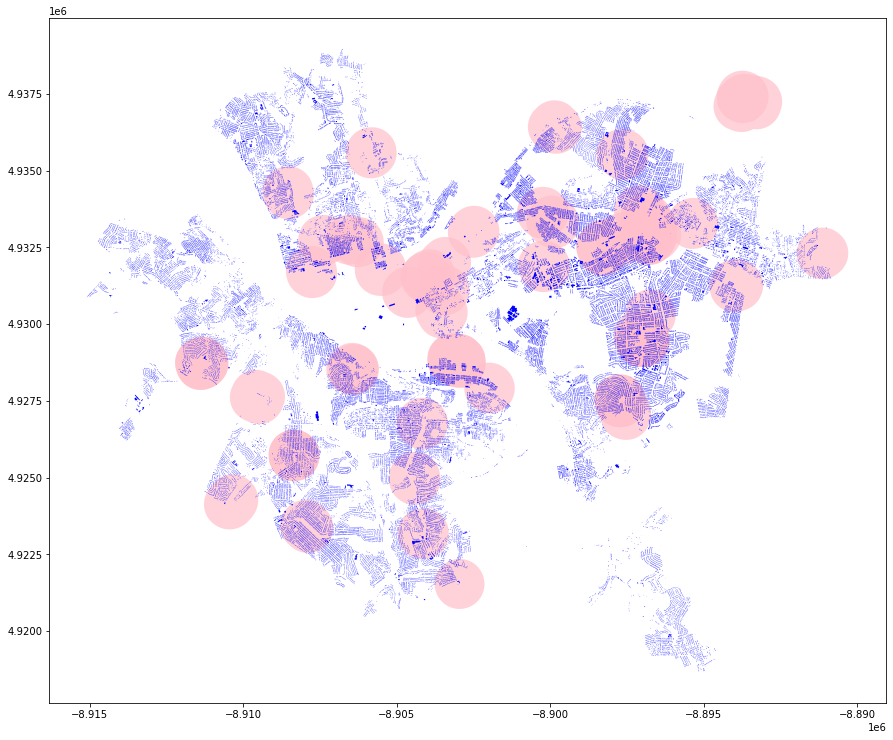

In [6]:
# plotting
f, ax = plt.subplots(figsize=(15,15))
grocery_stores.plot(ax=ax, alpha=0.7, color='pink', label='Grocery stores + 0.5 mile buffer')
res_buildings.plot(ax=ax, color='blue', label='Residential buildings')


In [12]:
## Plotting results

# Read results
new_stores = pd.read_csv('new_store_ids.csv')
top_3 = list(new_stores['building_id'])[:3]
top_3


['31851-C', '105592-R', '3018-R']

In [15]:
chosen_buildings = buildings_df[(buildings_df.building_id == top_3[0]) | (buildings_df.building_id == top_3[1]) | (buildings_df.building_id == top_3[2])]
chosen_buildings

,CLASS,class_reco,hood,geoid10,tractce10,geometry,building_id
3017,R,commercial,Oakwood,420035628002,562800,"POLYGON ((-80.06745 40.43069, -80.06746 40.430...",3018-R
31850,C,commercial,Brighton Heights,420032703002,270300,"POLYGON ((-80.04070 40.47982, -80.04071 40.479...",31851-C
105591,R,commercial,Greenfield,420031516003,151600,"POLYGON ((-79.94206 40.42599, -79.94188 40.426...",105592-R


<AxesSubplot:>

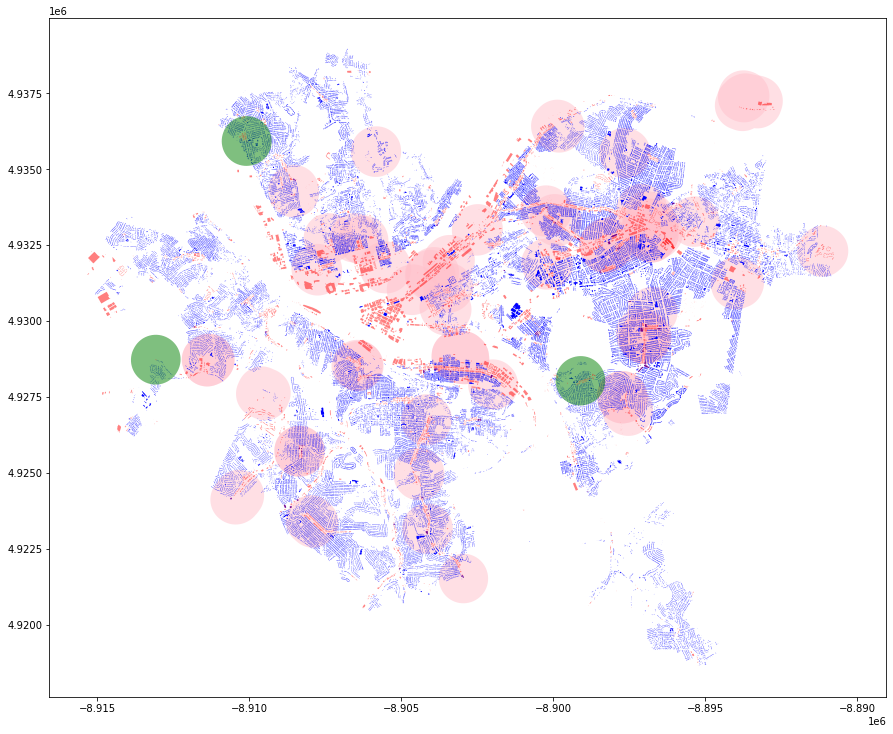

In [23]:
## Plotting results

# Read results
new_stores = pd.read_csv('new_store_ids.csv')
top_3 = list(new_stores['building_id'])[:3]
chosen_buildings = buildings_df[(buildings_df.building_id == top_3[0]) | (buildings_df.building_id == top_3[1]) | (buildings_df.building_id == top_3[2])]


grocery_stores = buildings_df[buildings_df['class_reco'].str.contains('Grocery')]
grocery_stores['geometry'] = grocery_stores['geometry'].to_crs(epsg=3857) # converting to this CRS changes the units to meters
grocery_stores['geometry'] = grocery_stores['geometry'].buffer(804.67) # 1609 meters = 1 mile - buffering adds a buffer around the point with this radius

res_buildings = buildings_df[buildings_df['class_reco'].str.contains('Residential')]
res_buildings['geometry'] = res_buildings['geometry'].to_crs(epsg=3857)

comm_buildings = buildings_df[buildings_df['class_reco'].str.contains('commercial')]
comm_buildings['geometry'] = comm_buildings['geometry'].to_crs(epsg=3857)

chosen_buildings['geometry'] = chosen_buildings['geometry'].to_crs(epsg=3857)
chosen_buildings['geometry'] = chosen_buildings['geometry'].buffer(804.67)


# plotting
f, ax = plt.subplots(figsize=(15,15))
grocery_stores.plot(ax=ax, alpha=0.5, color='pink', label='Grocery stores + 0.5 mile buffer')
res_buildings.plot(ax=ax, color='blue', label='Residential buildings')
chosen_buildings.plot(ax=ax, alpha=0.5, color='green', label='New stores placement')
comm_buildings.plot(ax=ax, alpha=0.5, color='red', label='Commercial buildings')


